In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv') # read in the csv file

# 891 samples, 12 Attributes
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# When describing the dataframe, notice some attributes are missing
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# notice Age,Cabin, and Embarked are missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Questions we might want to ask:
- What percentage of passengers survived the Titanic disaster?
- What percentage survived in each class (first, coach, etc.)?
- How many people traveled in each class? How many classes are there?

In [4]:
# Calculate the % of individuals that survived on the titanic
total_survived    = sum(df.Survived==1)
total_individuals = len(df)

survived_percent = (total_survived / total_individuals) * 100.0
print(survived_percent)

38.38383838383838


## Grouping the Data

In [5]:
# First let's aggregate by class
df_grouped = df.groupby(by='Pclass')

# Now let's count the # of passengers per class
for val,grp in df_grouped:
    print('There were',len(grp), 'people traveling in', val, 'class.')

There were 216 people traveling in 1 class.
There were 184 people traveling in 2 class.
There were 491 people traveling in 3 class.


In [6]:
# for each passenger class, sum all of values within the 'Survived' column to calculate
# the number of individuals who survived
print(df_grouped['Survived'].sum())

print('----------------------------------------')

# total number of individuals per passenger class
print(df_grouped.Survived.count())

print('----------------------------------------')

# Survival percentage per class
for val,grp in df_grouped['Survived']:
    print('Of the', len(grp), 'people in class', str(val) + ",", \
          '~' + str(round((sum(grp) / len(grp)) * 100.0)) + '% survived.')

#
# OR  print(df_grouped.Survived.sum() / df_grouped.Survived.count())

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
----------------------------------------
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
----------------------------------------
Of the 216 people in class 1, ~63% survived.
Of the 184 people in class 2, ~47% survived.
Of the 491 people in class 3, ~24% survived.


In [7]:
## Class Exercise: Create code for calculating the std error
for val,grp in df_grouped['Survived']:
    print('Std Error for class',val, 'is',np.std(grp) / np.sqrt(len(grp)))

print('=============================')

# Same as above, but less accurate
print(df_grouped.Survived.std() / np.sqrt(df_grouped.Survived.count()))

Std Error for class 1 is 0.03285744737175167
Std Error for class 2 is 0.036806011622771265
Std Error for class 3 is 0.01933849677874167
Pclass
1    0.032934
2    0.036906
3    0.019358
Name: Survived, dtype: float64


## Cleaning the Dataset

Use the `missingno` package to help visualize where the data contains `NaNs`.

### Plot Type 1: Filter Bar

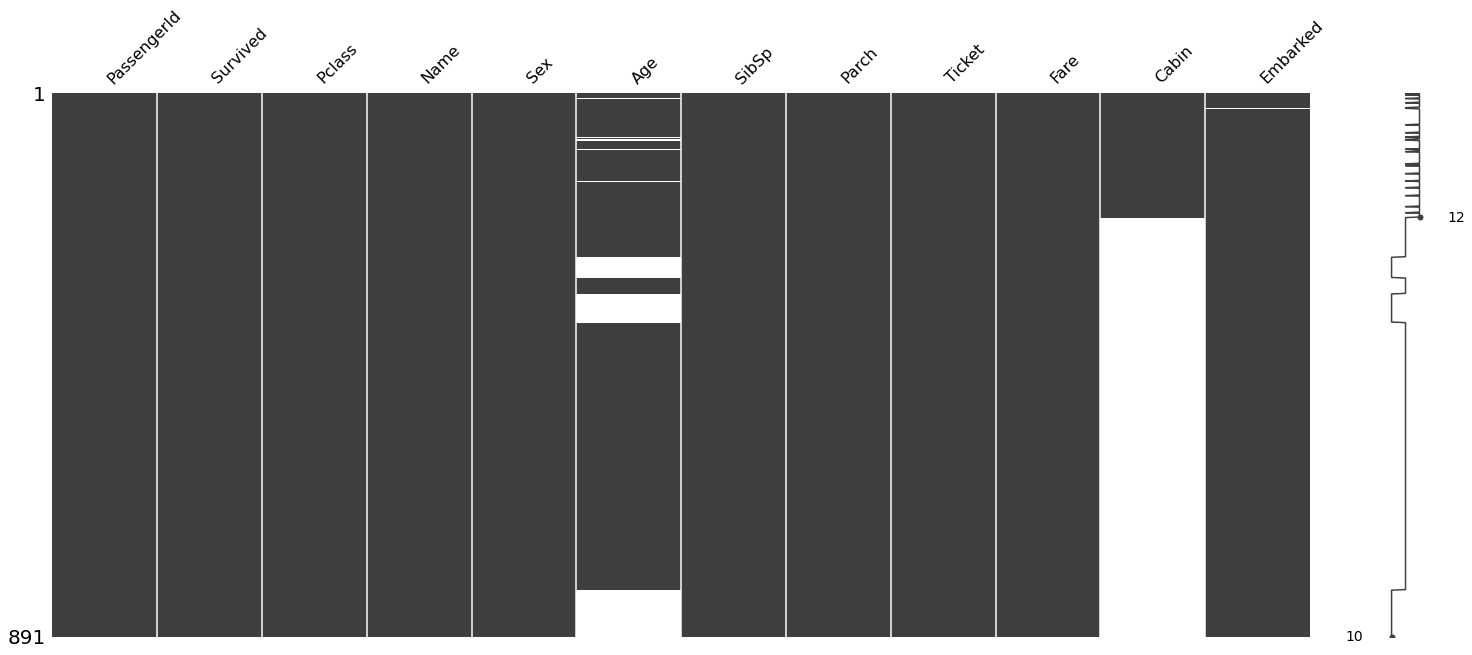

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

import missingno as mn

# first sort "Cabin" column, then "Embarked", and lastly the "Age" column
mn.matrix(df.sort_values(by=["Cabin","Embarked","Age"]))

In [9]:
# Now let's clean the dataset

# 1. Remove attributes that just aren't useful for us
for col in ['PassengerId', 'Name', 'Cabin', 'Ticket']:
    if col in df:
        del df[col]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
# impute based upon the K closest samples (rows)
from sklearn.impute import KNNImputer
import copy

# get object for imputation
knn_obj = KNNImputer(n_neighbors=5)

# create numpy matrix from pandas numeric values to impute
temp_numpy_arr = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].to_numpy()

# fit on dataset
knn_obj.fit(temp_numpy_arr)

# Then, the fit imputer is applied to a dataset.
# Why? To create a copy of the dataset w/ all missing values for each column
# To then be replaced w/ an estimated value.

temp_imputed = knn_obj.transform(temp_numpy_arr)

# this works as well --> temp_imputed = knn_obj.fit_transform(temp_numpy_arr)

# Create a deep copy (IMPORTANT)
df_imputed = copy.deepcopy(df)
df_imputed[['Pclass','Age','SibSp','Parch','Fare']] = temp_imputed
df_imputed.info()

# notice we now have 891 entries on all columns except for Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 55.8+ KB


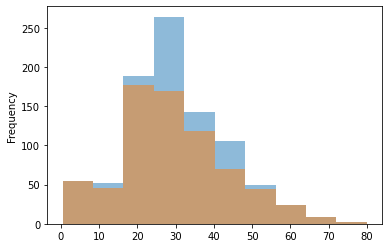

In [11]:
# Let's compare the data using basic plotting
df_imputed.Age.plot(kind='hist',alpha=0.5)   # Blue
df.Age.plot(kind='hist', alpha=0.5)          # Brown

plt.show()

## Feature Discretization

**Does age range influence survival rate?**

In [12]:
# let's break up the age variable
df_imputed['age_range'] = pd.cut(df_imputed['Age'],[0,15,25,65,1e6],
                                 labels=['child','young adult','adult','senior']) # this creates a new variable
df_imputed.age_range.describe()

count       891
unique        4
top       adult
freq        556
Name: age_range, dtype: object

In [13]:
df_grouped = df_imputed.groupby(by=['Pclass','age_range'])
print("% of Survivors per class:")
survivors_percentage = df_grouped.Survived.sum() / df_grouped.Survived.count() * 100
print(survivors_percentage)

% of Survivors per class:
Pclass  age_range  
1.0     child           83.333333
        young adult     78.378378
        adult           59.763314
        senior          25.000000
2.0     child          100.000000
        young adult     41.304348
        adult           41.880342
        senior           0.000000
3.0     child           44.067797
        young adult     21.250000
        adult           21.851852
        senior           0.000000
Name: Survived, dtype: float64


## Visualization in Python with Pandas, Matplotlib, and others

In [14]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# Question 1:
**What were the ages of the passengers on the Titanic?**

**Plot Type 2: Histogram & Kernel Density Estimation**

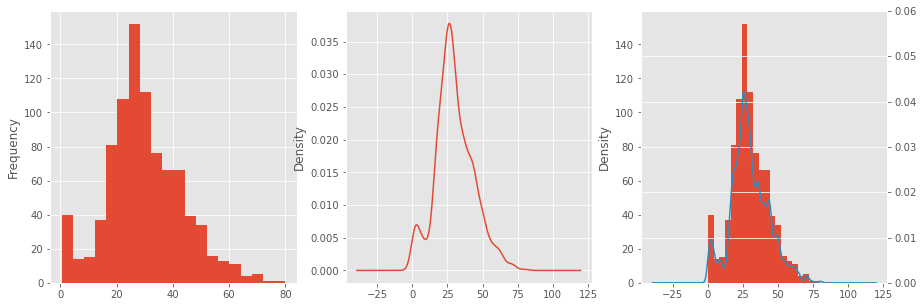

In [15]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

# plt.subplot(row,columns,column)
plt.subplot(1,3,1)
df_imputed.Age.plot.hist(bins=20)

plt.subplot(1,3,2)
df_imputed.Age.plot.kde(bw_method=0.2)

plt.subplot(1,3,3)
df_imputed.Age.plot.hist(bins=20)
df_imputed.Age.plot.kde(bw_method=0.1,secondary_y=True)
plt.ylim([0,0.06])


plt.show()

### Two-Dimensional Distributions
- Estimate the joint distribution of the values of two attributes
 - Example: petal width and petal length
  - What does this tell us?

 **Question: How does age relate to the fare that was paid?**

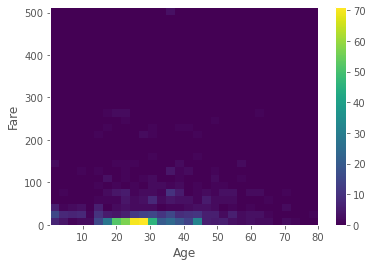

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [16]:
plt.hist2d(x=df_imputed.Age, y=df_imputed.Fare, bins=30)
plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# Print out details of the passenger/s with the most w/ the most
# expensive tickets
df[df['Fare']==df['Fare'].max()]

## Feature Correlation Plot
 - First lets visualize the correlation between the different features.

  ### Plot Type Three: Heatmap (of correlation)

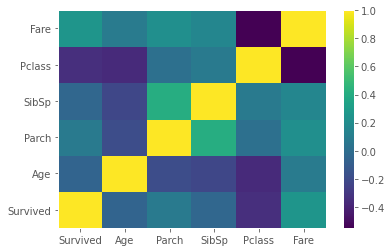

In [17]:
use_vars = ['Survived', 'Age', 'Parch', 'SibSp', 'Pclass', 'Fare']
plt.pcolor(df_imputed[use_vars].corr())

plt.xticks(np.arange(0.5, len(use_vars), 1), use_vars)
plt.yticks(np.arange(0.5, len(use_vars), 1), use_vars)
plt.colorbar()

plt.show()

### Grouped Count Plots
Used when you have multiple categorical or nominal variables that you want to show together in sub-groups.
Grouping mean to display the counts of different subgroups on the dataset.
For the titanic data, this can be quite telling of the dataset.

**Question: Does age, gender, or class have an effect on survival?**

 ### Plot Type Four: Grouped Bar Chart

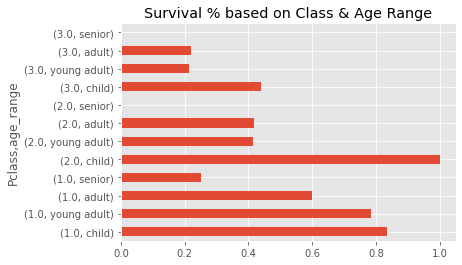

In [18]:
df_grouped = df_imputed.groupby(by=['Pclass', 'age_range'])

# tabulate survivor rates per group
survival_rate = df_grouped.Survived.sum() / df_grouped.Survived.count()

# show in bar chart using pandas
ax = survival_rate.plot(kind='barh')
plt.title('Survival % based on Class & Age Range')
plt.show()

Survived            False  True 
Pclass age_range                
1.0    child            1      5
       young adult      8     29
       adult           68    101
       senior           3      1
2.0    child            0     19
       young adult     27     19
       adult           68     49
       senior           2      0
3.0    child           33     26
       young adult    126     34
       adult          211     59
       senior           2      0


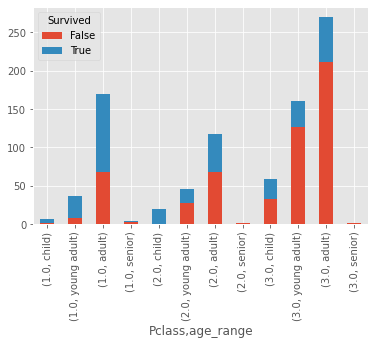

In [19]:
survival = pd.crosstab(
    [df_imputed['Pclass'],df_imputed['age_range']], # categories to cross tabulate
     df_imputed.Survived.astype(bool))              # how to group

print(survival)

survival.plot(kind='bar', stacked=True)

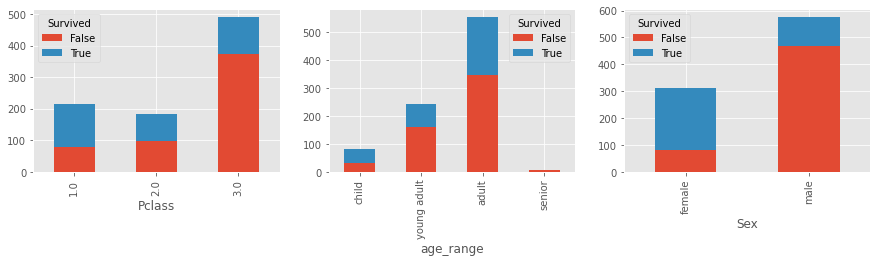

In [20]:
# plot overall cross tab w/ both groups
plt.figure(figsize=(15,3))

ax1 = plt.subplot(1,3,1)
pd.crosstab([df_imputed['Pclass']], df_imputed.Survived.astype(bool)).plot(kind='bar', stacked=True, ax=ax1)

ax2 = plt.subplot(1,3,2)
pd.crosstab([df_imputed['age_range']], df_imputed.Survived.astype(bool)).plot(kind='bar', stacked=True, ax=ax2)

ax3 = plt.subplot(1,3,3)
pd.crosstab([df_imputed['Sex']], df_imputed.Survived.astype(bool)).plot(kind='bar', stacked=True, ax=ax3)

plt.show()

### Sub-group Distribution Plots
- Box Plots
 - Invented by J. Tukey
 - Another way of displaying the distribution of data
 - Following figure shows the basic part of a box plot:

<img src="../MachineLearning_SummerPlan/MachineLearningNotebooks/data/TukeyPlot.png" alt="TukeyBoxplot" width="600" height="600">

 #### Plot Type Five: Box Plot

c:\users\luis\desktop\summer2020\ml\machinelearning_summerplan\venv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


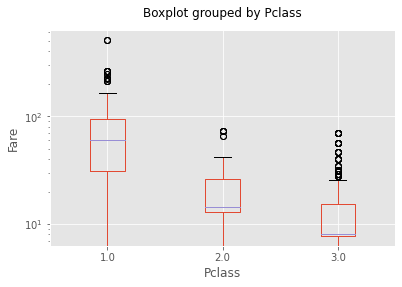

In [26]:
ax = df_imputed.boxplot(column='Fare', by='Pclass')
plt.ylabel('Fare')
plt.title('')
ax.set_yscale('log') # change y to logarithmic scale so the box plot isn't squished

The problem with boxplots is that they might hide important aspects of the ditribution. For example, this plot shows data that all have the exact same boxplot.

<img src="https://i.redd.it/cad7mdrg9wez.gif" alt="TukeyBoxplot" width="600" >
